In [12]:
                        # Fill in the following 3 variables
################################################################################################
files = ["../../datasets/long/ZGC_long.log", "../../datasets/long/ShenandoahGC_long.log", "../../datasets/long/ParallelGC_long.log"] 
labels = ["ZGC Long", "Shenandoah Long", "ParallelGC Long"]
# time_range_seconds = [0, 100]
time_range_seconds = None  # includes full log
################################################################################################

In [13]:
# The following is necessary to run the cells that follow. Run this cell once at the beginning
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../")
plt.rcParams["figure.figsize"] = [12, 7]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [14]:
from src.read_log_file import get_parsed_comparions_from_files 

gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds)

## How to use filter_by and group_by

> ### `filter_by` : list of tuples -> (col, val), where column is a column in the gc_event_dataframe, and val is the EXACT value each row must match to remain in the dataset. Setting val = None means ANY non "None" value will remain in the dataset. 
> Example: `filter_by = [("EventType", "Pause")]` #     Only looks at rows that represent a Pause

> Example: `filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]` # Only looks at rows that include allocation for both Before & After gc

<br />

> ### `group_by` string, representing a column in the gc_event_dataframe. For each unique value in each log, a new group is created and independently plotted. leaving group_by = None means all data after filters shall be a group
> Example: `group_by "EventName"` 

## Compare STW pauses during runtime

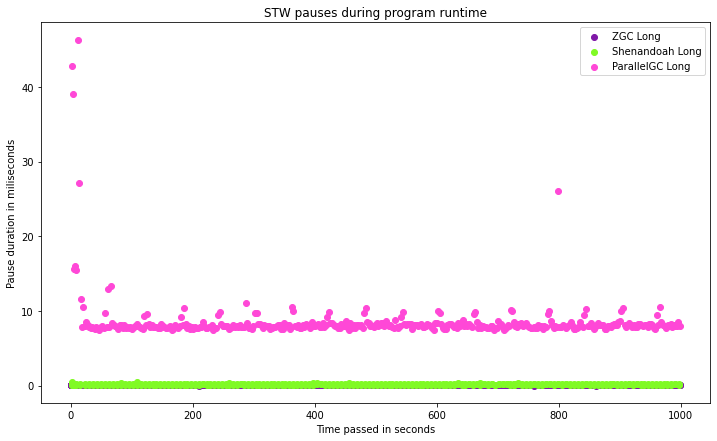

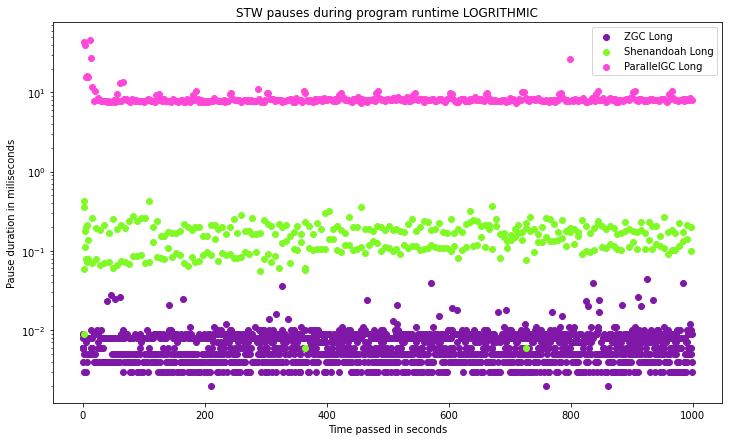

In [15]:
from plotting import plot_scatter


# Chart #1, linear Y axis
graph = plot_scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels=labels)
_ = graph.set_title("STW pauses during program runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")

############################################################################################################

# Chart #2, logritmic Y axos
graph = plot_scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels = labels)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("STW pauses during program runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
_ = graph.set_ylabel("Pause duration in miliseconds")

## Concurrent durations during runtime

Text(0, 0.5, 'Concurrent durations in miliseconds')

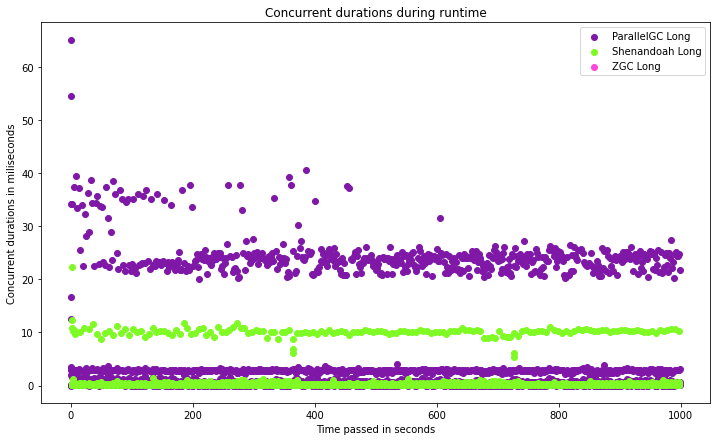

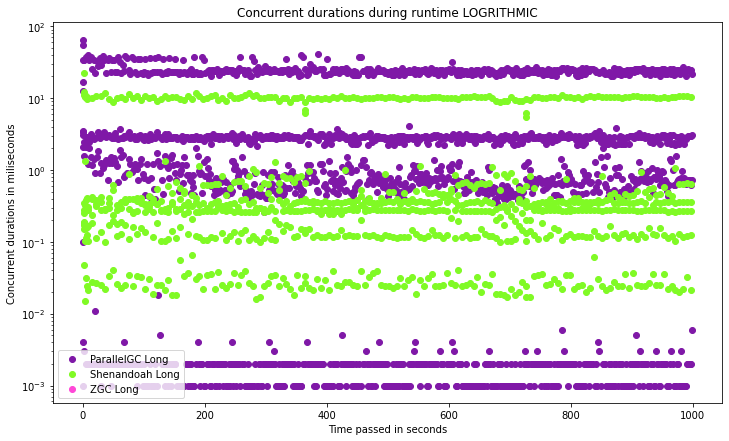

In [29]:
from plotting import plot_scatter
# Linear graph
graph = plot_scatter(gc_event_dataframes, filter_by = [("EventType", "Concurrent")], labels=labels)
_ = graph.set_title("Concurrent durations during runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

# Logrithmic Graph
graph = plot_scatter(gc_event_dataframes, labels=labels, filter_by = [("EventType", "Concurrent")])
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("Concurrent durations during runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

## Time spent in STW vs. Concurrent

['ZGC Long', 'Shenandoah Long', 'ParallelGC Long']


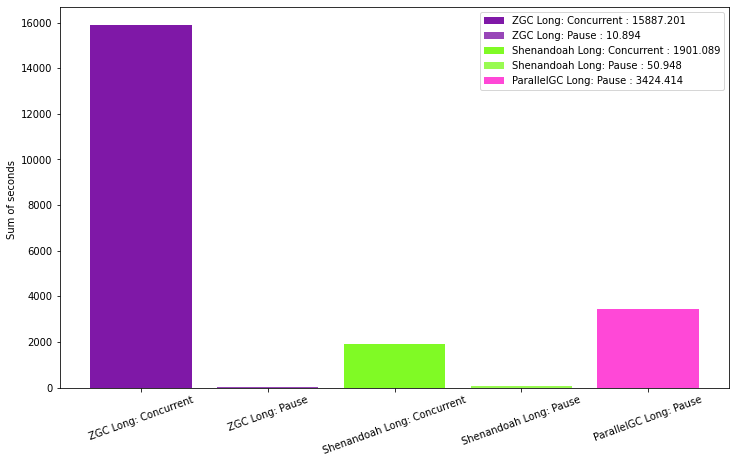

In [17]:
from plotting import plot_bar_sum
print(labels)
graph = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = [("Duration_miliseconds", None)], labels= labels)
_ = graph.set_title = "Sum of event durations in miliseconds"
_ = graph.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 20)


## Comparing Trends within the data

In [18]:
from plotting import plot_trends
print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")],
       labels= labels,
       throughput=True)
print("\n\n\n")

print("\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------------
ZGC Long                | 1689         | 0.044        | 10.894       | 0.0064       | 0.0034       | 100.0%       | 
Shenandoah Long         | 326          | 0.431        | 50.948       | 0.1563       | 0.0653       | 99.99%       | 
ParallelGC Long         | 399          | 46.344       | 3424.414     | 8.5825       | 3.3959       | 99.66%       | 




			Pauses by name during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
------------------------

## Percentiles of event durations

In [24]:
from plotting import plot_percentiles
print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels)

print("\n\n")

print("\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)

# TODO: fix the printing of the second table's TITLES

			Pauses during runtime
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ParallelGC | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.02 ms   | 0.04 ms   | 0.04 ms   | 
Shenandoah | 0.16 ms   | 0.2 ms    | 0.24 ms   | 0.26 ms   | 0.36 ms   | 0.43 ms   | 0.43 ms   | 
ZGC Long   | 8.01 ms   | 8.23 ms   | 9.34 ms   | 10.04 ms  | 26.12 ms  | 44.94 ms  | 46.2 ms   | 
Labels:  ['ParallelGC Long', 'Shenandoah Long', 'ZGC Long']



			Pauses during runtime by name
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ParallelGC | 0.01 ms   | 0.01

## Mean durations in miliseconds, pauses

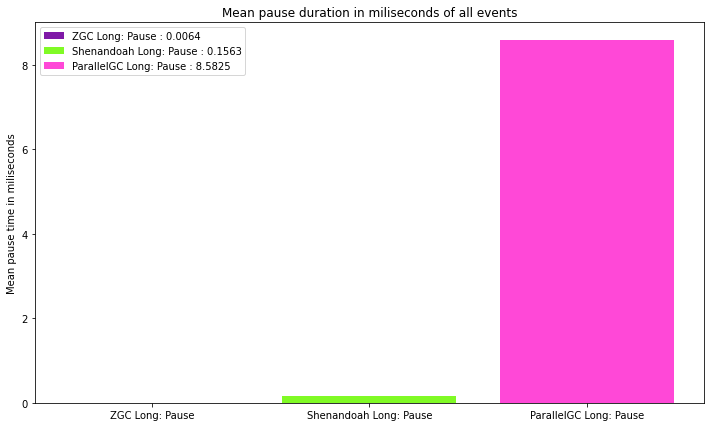

In [20]:

from plotting import plot_bar_avg

graph = plot_bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = [("EventType", "Pause")], labels = labels)
_ = graph.set_title("Mean pause duration in miliseconds of all events")
_ = graph.set_ylabel("Mean pause time in miliseconds")


## Heap allocation used before & after GC

['ZGC Long', 'Shenandoah Long', 'ParallelGC Long']


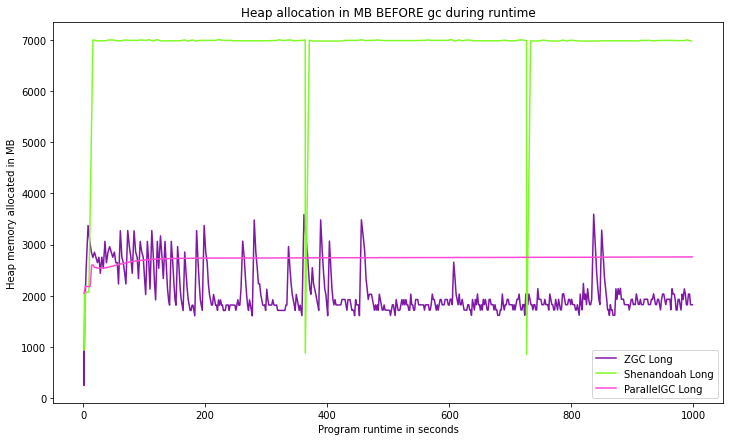

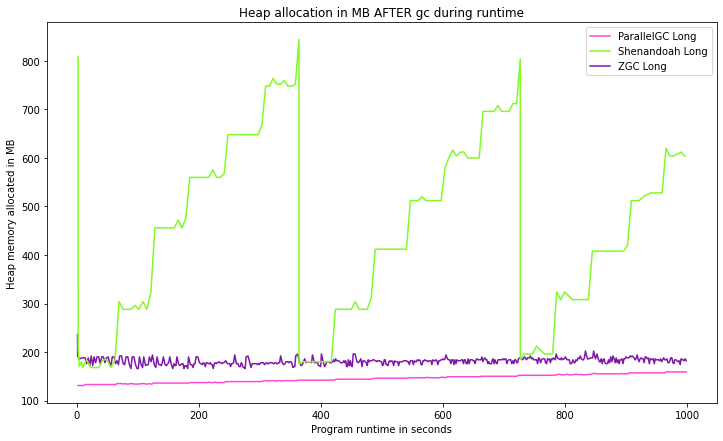

In [21]:
from plotting import plot_line
print(labels)

plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapBeforeGC", None)],
            labels = labels,
            #labels = [label + " Before GC" for label in labels], 
            column = "HeapBeforeGC")
_ = plot.set_title("Heap allocation in MB BEFORE gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")


plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapAfterGC", None)],
            labels = labels,
           # labels = [label + " After GC" for label in labels], 
            column = "HeapAfterGC")

_ = plot.set_title("Heap allocation in MB AFTER gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")

handles, labels = plot.get_legend_handles_labels()

# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plot.legend(handles, labels)

## MB reclaimed during GC during runtime

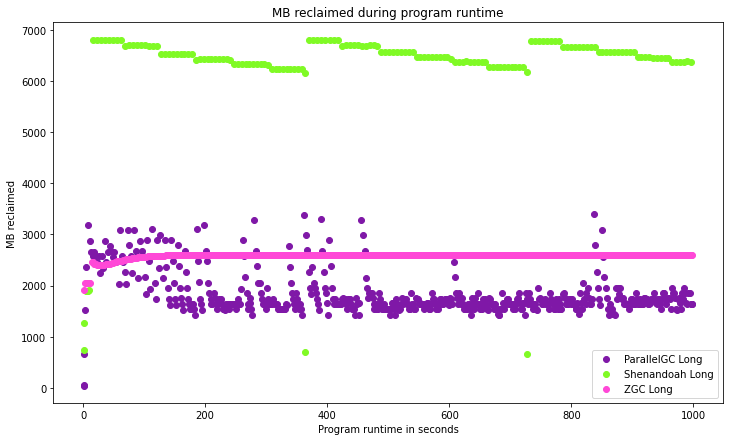

In [22]:
from plotting import plot_reclaimed_bytes

filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]
graph = plot_reclaimed_bytes(gc_event_dataframes, filter_by = filter_by, labels = labels)

_ = graph.set_title("MB reclaimed during program runtime")
_ = graph.set_ylabel("MB reclaimed")
_ = graph.set_xlabel("Program runtime in seconds")


## Heatmaps for each log

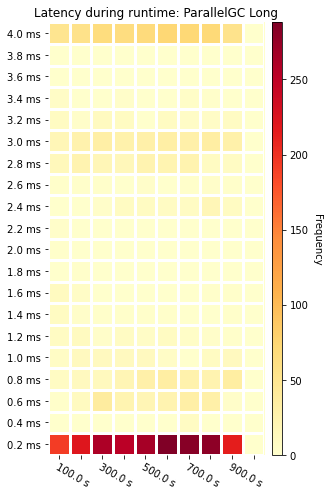

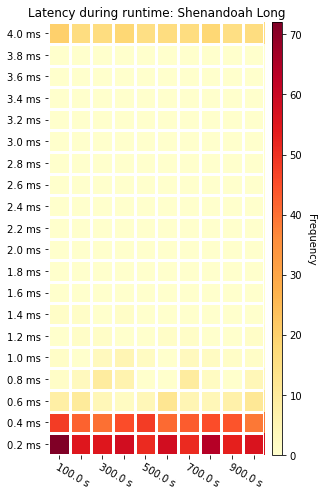

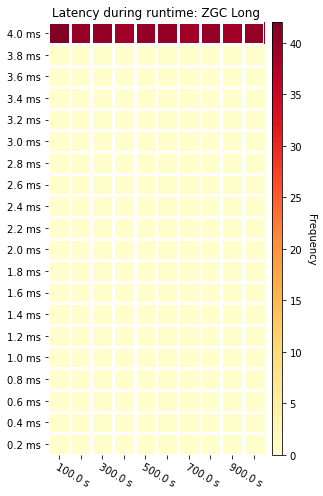

In [28]:
from src.graphing.heatmap import plot_heatmap, get_heatmap_data
for label, gc_event_dataframe in zip(labels, gc_event_dataframes):
    heatmap, dimensions = get_heatmap_data(gc_event_dataframe, 10,20,100,0.2, True)                                                                                   # Set true to false 
#plot_heatmap(heatmap, dimensions, True)
    graph = plot_heatmap(heatmap, dimensions, False)
    graph.set_title("Latency during runtime: " +  label)
plt.rcParams["figure.figsize"] = [12, 7]

In [ ]:
Histograms of freqency

In [ ]:
Percentiles histogram style during runtime